In [88]:
import pandas as pd
import ast
import numpy as np

In [89]:
path = "/Users/amankrishna/Downloads/Compressed/archive(1)/"
metadata = pd.read_csv(path + 'movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(path + 'ratings.csv')

In [90]:
links = pd.read_csv(path + 'links.csv')

In [91]:
#group the rating by movieId and calculate the mean of the rating
ratings = ratings.groupby('movieId').mean().reset_index()

In [92]:
metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [93]:
#Change budget, revenue, id, vote_average, vote_count to numeric
metadata['budget'] = pd.to_numeric(metadata['budget'], errors='coerce')
metadata['revenue'] = pd.to_numeric(metadata['revenue'], errors='coerce')
metadata['id'] = pd.to_numeric(metadata['id'], errors='coerce')
metadata['vote_average'] = pd.to_numeric(metadata['vote_average'], errors='coerce')
metadata['vote_count'] = pd.to_numeric(metadata['vote_count'], errors='coerce')
metadata['runtime'] = pd.to_numeric(metadata['runtime'], errors='coerce')
metadata['popularity'] = pd.to_numeric(metadata['popularity'], errors='coerce')
#if adult is "TRUE" then 1 else 0
metadata['adult'] = metadata['adult'].apply(lambda x: 1 if x == "True" else 0)
#convert release_date to datetime
metadata['release_date'] = pd.to_datetime(metadata['release_date'], errors='coerce')
#drop nan from release_date
metadata = metadata.dropna(subset=['release_date'])
#if the year is greater than 2020, then it is a mistake subtract 100 years
metadata['release_date'] = metadata['release_date'].apply(lambda x: x.replace(year=x.year-100) if x.year > 2023 else x)
#create a yyyymm column
metadata['vintage'] = metadata['release_date'].apply(lambda x: x.strftime('%Y%m'))
metadata['release_date'] = metadata['release_date'].astype(np.int64) // 10**9
metadata['release_date'] = metadata['release_date'] / (60*60*24*365)
metadata.reset_index(drop=True, inplace=True)

In [94]:
metadata.dtypes

adult                      int64
belongs_to_collection     object
budget                   float64
genres                    object
homepage                  object
id                       float64
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date             float64
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
vintage                   object
dtype: object

In [95]:
metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'vintage'],
      dtype='object')

In [96]:
# extract the values of the "genres" column and convert them into a list of dictionaries
genres_list = metadata['genres'].apply(lambda x: ast.literal_eval(x))

# go through each list of dictionaries and extract the "name" key
genres_list = genres_list.apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

# create a column for each genre
for i in range(len(genres_list)):
    for j in genres_list[i]:
        metadata.loc[i, j] = 1
# fillna with 0 from column 25 to the end
metadata.iloc[:, 25:] = metadata.iloc[:, 25:].fillna(0)
#convert columns 25 to the end to int
metadata.iloc[:, 25:] = metadata.iloc[:, 25:].astype(int)

In [97]:
# drop the "genres" column
metadata = metadata.drop('genres', axis=1)
# Conver the belongs_to_collection column to a 1/0 column
metadata['belongs_to_collection'] = metadata['belongs_to_collection'].notnull()
#if belongs_to_collection is True then 1 else 0
metadata['belongs_to_collection'] = metadata['belongs_to_collection'].apply(lambda x: 1 if x == True else 0)
#convert homepage to True/False
metadata['homepage'] = metadata['homepage'].notnull()
#if homepage is True then 1 else 0
metadata['homepage'] = metadata['homepage'].apply(lambda x: 1 if x == True else 0)
#Drop all the rows with original_language not a two letter code
metadata = metadata[metadata['original_language'].str.len() == 2]
#drop all the rows with metadata.original_language.value_counts() < 10
metadata = metadata[metadata['original_language'].isin(metadata.original_language.value_counts()[metadata.original_language.value_counts() > 10].index)]
#drop poster_path
metadata = metadata.drop(['poster_path','overview','production_companies','spoken_languages', 'tagline'], axis=1)
#metadata = metadata.drop(['poster_path','production_companies','spoken_languages'], axis=1)

In [98]:
#drop nan values in production_countries
metadata = metadata[metadata['production_countries'].notna()]

In [99]:
metadata.reset_index(drop=True, inplace=True)

In [100]:
# extract the values of the "production_countries" column and convert them into a list of dictionaries
production_countries_list = metadata['production_countries'].apply(lambda x: ast.literal_eval(x))

# go through each list of dictionaries and extract the "name" key
production_countries_list = production_countries_list.apply(lambda x: [i['iso_3166_1'] for i in x] if isinstance(x, list) else [])

# create a column for each genre
for i in range(len(production_countries_list)):
    for j in production_countries_list[i]:
        metadata.loc[i, j] = 1
# fillna with 0 from column 39 to the end
metadata.iloc[:, 39:] = metadata.iloc[:, 39:].fillna(0)

/var/folders/js/d6m3lmg13x1dqjyw_1h8pr8h0000gn/T/ipykernel_72363/793501323.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  metadata.loc[i, j] = 1
/var/folders/js/d6m3lmg13x1dqjyw_1h8pr8h0000gn/T/ipykernel_72363/793501323.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  metadata.loc[i, j] = 1
/var/folders/js/d6m3lmg13x1dqjyw_1h8pr8h0000gn/T/ipykernel_72363/793501323.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

In [101]:
#convert columns 39: to int
metadata.iloc[:, 39:] = metadata.iloc[:, 39:].astype(int)

In [102]:
metadata.drop('production_countries', axis=1, inplace=True)

In [103]:
#make status as dummy variable
metadata = pd.get_dummies(metadata, columns=['status'])

In [104]:
#if video is true then 1 else 0
metadata['video'] = metadata['video'].apply(lambda x: 1 if x == True else 0)

In [105]:
#remove tt from imdb_id
metadata['imdb_id'] = metadata['imdb_id'].apply(lambda x: str(x)[2:])

In [106]:
#merge metadata imdb_id with links imdbId left join
metadata = pd.merge(metadata, links, left_on='id', right_on='tmdbId', how='left')

In [107]:
metadata.drop(['imdbId','tmdbId'], axis=1, inplace=True)

In [108]:
#merge metadata movieID with ratings movieId left join
metadata = pd.merge(metadata, ratings, left_on='movieId', right_on='movieId', how='left')

In [109]:
#make a key with id and original_title
metadata['key'] = metadata['vintage'].astype(str) + metadata['original_title']
#convert the id to int
metadata['id'] = metadata['id'].astype(int)
#make key as index
metadata.set_index('id', inplace=True)
#drop unneccessary columns
metadata = metadata.drop(['imdb_id','original_title','title','movieId','vintage','timestamp','userId'], axis=1)

In [110]:
#conver original_language to dummy variables
metadata = pd.get_dummies(metadata, columns=['original_language'])

In [111]:
metadata.dropna(inplace=True)

In [112]:
metadata.to_csv('metadata_finally.csv')

In [113]:
print(metadata.columns)

Index(['adult', 'belongs_to_collection', 'budget', 'homepage', 'popularity',
       'release_date', 'revenue', 'runtime', 'video', 'vote_average',
       ...
       'original_language_sr', 'original_language_sv', 'original_language_ta',
       'original_language_te', 'original_language_th', 'original_language_tl',
       'original_language_tr', 'original_language_uk', 'original_language_xx',
       'original_language_zh'],
      dtype='object', length=242)


In [114]:
#drop all rows with revenue or budget is 0
metadata = metadata[(metadata['revenue'] != 0) & (metadata['budget'] != 0)]
metadata['return'] = metadata['revenue'] / metadata['budget']

In [115]:
#if return >= 1 then 1 else 0
metadata['return'] = metadata['return'].apply(lambda x: 1 if x >= 1 else 0)

In [116]:
metadata.drop(['revenue','key'], axis=1, inplace=True)

In [117]:
X, y = metadata.drop('return', axis=1), metadata['return']

In [118]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
# Standardize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Initialize Lasso model and fit to data
lasso = LassoCV(cv=5)
lasso.fit(X_std, y)

# Get coefficients of selected features
coef = pd.Series(lasso.coef_, index=X.columns)
important_features = coef[coef != 0].index.tolist()

# Print the most important features and the optimal alpha value
print('The most important features are:')
print(important_features)
print(f'The optimal alpha value is: {lasso.alpha_}')

#generate a feature_importance dataframe
feature_importance = pd.DataFrame({'feature':X.columns, 'importance':lasso.coef_})

The most important features are:
['belongs_to_collection', 'homepage', 'release_date', 'vote_average', 'vote_count', 'Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Horror', 'Science Fiction', 'Mystery', 'Foreign', 'Music', 'TV Movie', 'US', 'DE', 'GB', 'FR', 'IT', 'CN', 'ZA', 'CA', 'CH', 'BE', 'NL', 'TN', 'IE', 'HR', 'AT', 'TW', 'NZ', 'PE', 'LI', 'SE', 'AR', 'IS', 'CZ', 'IN', 'BR', 'GR', 'BF', 'BG', 'KZ', 'DZ', 'LU', 'IL', 'EC', 'MA', 'BS', 'PK', 'TH', 'NA', 'CO', 'UY', 'PR', 'MT', 'CR', 'GH', 'MC', 'CS', 'LT', 'PY', 'QA', 'AO', 'status_Post Production', 'rating', 'original_language_ca', 'original_language_en', 'original_language_fr', 'original_language_id', 'original_language_nl', 'original_language_pl', 'original_language_ro', 'original_language_ta', 'original_language_te', 'original_language_xx']
The optimal alpha value is: 0.004420367349204328


In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

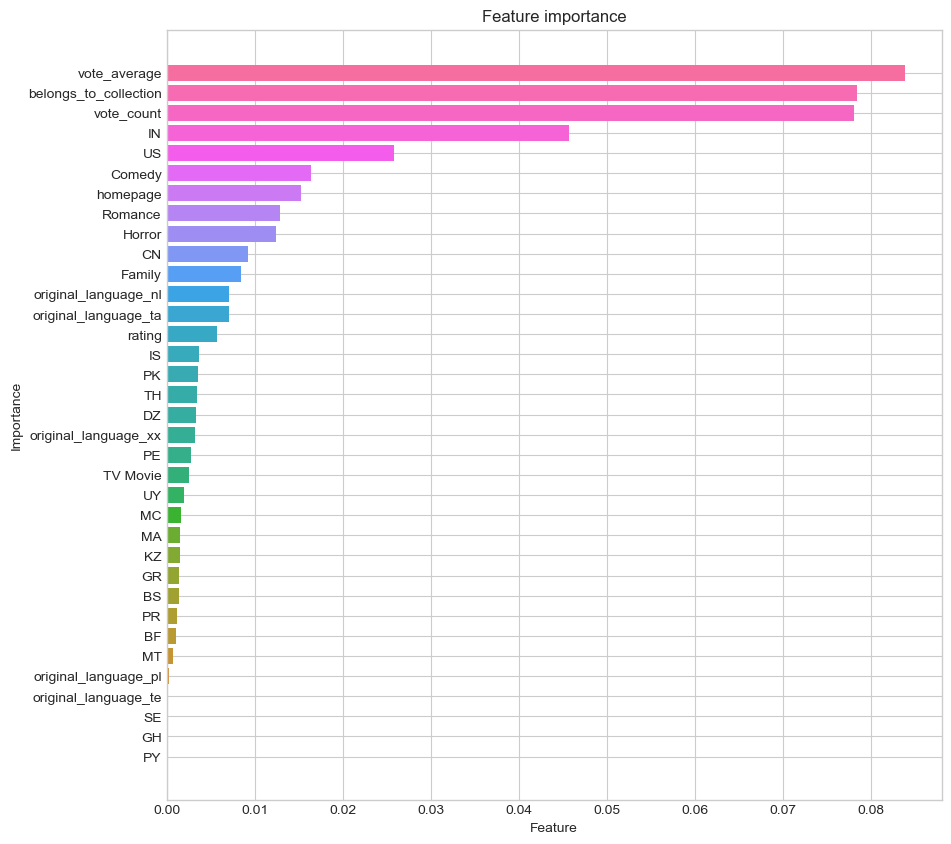

In [120]:
# PLot a bar plot in scale of purples and greens of feature > 0
feature_importance.sort_values(by='importance', ascending=True, inplace=True)
# Filter out the features with importance > 0
feature_importance2 = feature_importance[feature_importance['importance'] > 0]
# Plot a bar plot in scale of chroma
# White background
plt.style.use('seaborn-whitegrid')
# Set the size of the figure
plt.figure(figsize=(10, 10))
# Set the title of the plot
plt.title('Feature importance')
# Set the x and y labels
plt.xlabel('Feature')
plt.ylabel('Importance')
# Plot the bar plot
plt.barh(feature_importance2['feature'], feature_importance2['importance'], color=sns.color_palette("husl", len(feature_importance2)))
# Show the plot
plt.show()

In [121]:
#take only the top features
top_features = feature_importance2['feature'].tolist()

In [122]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, test_size=0.25, stratify=y)

In [123]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

def train_model_xgb(X, y):
    # Split the data into training and testing sets
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, stratify=y,random_state=123)

    # Define the hyperparameter space to search over
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 1],
        'max_depth': [2, 3, 4],
        'min_samples_split': [2, 4, 8]
    }

    # Create a GradientBoostingClassifier object
    clf = GradientBoostingClassifier(random_state=42)
    
    #score with default parameters
    clf.fit(train_X, train_y)
    score_default = clf.score(test_X, test_y)

    # Create a GridSearchCV object to find the best hyperparameters
    grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1, verbose=1)

    # Fit the GridSearchCV object to the training data
    grid_search.fit(train_X, train_y)

    # Print the best hyperparameters and score
    print("Best hyperparameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)

    # Get the best estimator from the grid search
    best_clf = grid_search.best_estimator_

    # Evaluate the best estimator on the test data
    score = best_clf.score(test_X, test_y)
    print("Test score:", score)

    return best_clf, score, score_default


In [124]:
clf, score, score_cfl_d = train_model_xgb(X, y)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 300}
Best score: 0.7980965886070821
Test score: 0.7901578458681523


In [125]:
score_clf = clf.score(test_X, test_y)
print("Test score:", score)
print("Test score Default:", score_clf)

Test score: 0.7901578458681523
Test score Default: 0.888558692421991


In [126]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

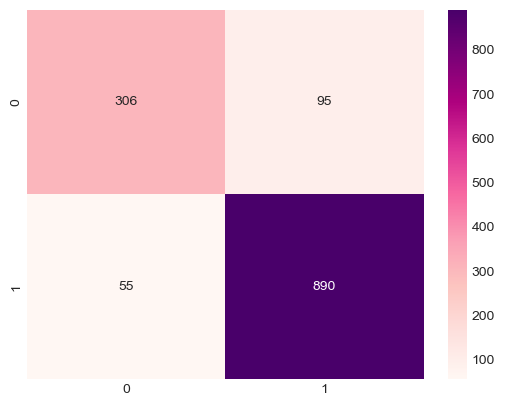

In [127]:
#plot a confusion matrix for the model
cnf = confusion_matrix(test_y, clf.predict(test_X))
#make a pretty confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cnf, annot=True, fmt='d', cmap='Blues')

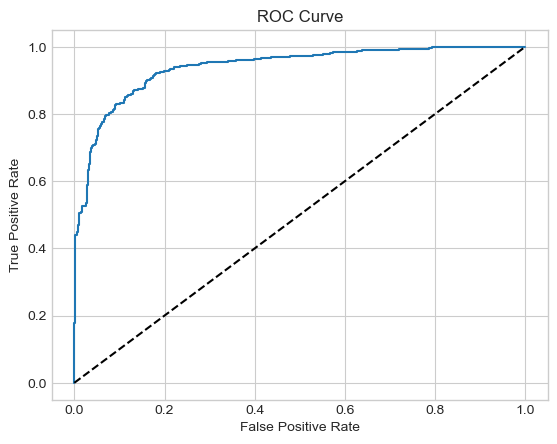

In [128]:
#ROC curve for the model
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
roc = roc_curve(test_y, clf.predict_proba(test_X)[:,1])
plt.plot(roc[0], roc[1])
plt.plot([0,1], [0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

In [129]:
#find misclassification rate for the model
misclassification_rate = 1 - score
print(f'Misclassification rate: {misclassification_rate}')

Misclassification rate: 0.2098421541318477


In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

def train_model_rf(X, y):
    # Split the data into training and testing sets
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)

    # Define the hyperparameter space to search over for the random forest
    param_grid = {
        'n_estimators': [200, 250],
        'max_depth': [9, 10, 11],
        'min_samples_split': [4, 8, 12]
    }

    # Create a RandomForestClassifier object
    rf = RandomForestClassifier(random_state=123)
    
    #score with default parameters
    rf.fit(train_X, train_y)
    score_default = rf.score(test_X, test_y)

    # Create a GridSearchCV object to find the best hyperparameters
    grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=1)

    # Fit the GridSearchCV object to the training data
    grid_search.fit(train_X, train_y)

    # Print the best hyperparameters and score
    print("Best hyperparameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)

    # Get the best estimator from the grid search
    best_rf = grid_search.best_estimator_

    # Evaluate the best estimator on the test data
    score = best_rf.score(test_X, test_y)
    print("Test score:", score)

    return best_rf, score, score_default

In [131]:
rf, score, score_rf_d = train_model_rf(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best hyperparameters: {'max_depth': 11, 'min_samples_split': 4, 'n_estimators': 250}
Best score: 0.7560430002971126
Test score: 0.7595171773444754


In [132]:
score = rf.score(test_X, test_y)
print("Test score:", score)
print("Test score Default:", score_rf_d)

Test score: 0.8090638930163447
Test score Default: 0.7994428969359332


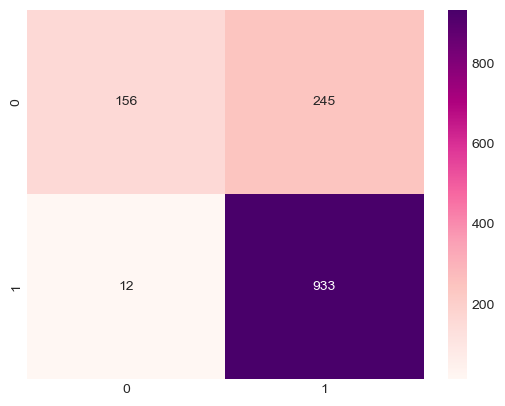

In [133]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#plot a confusion matrix for the model
cnf = confusion_matrix(test_y, rf.predict(test_X))
sns.heatmap(cnf, annot=True, fmt='d', cmap='RdPu')
plt.show()

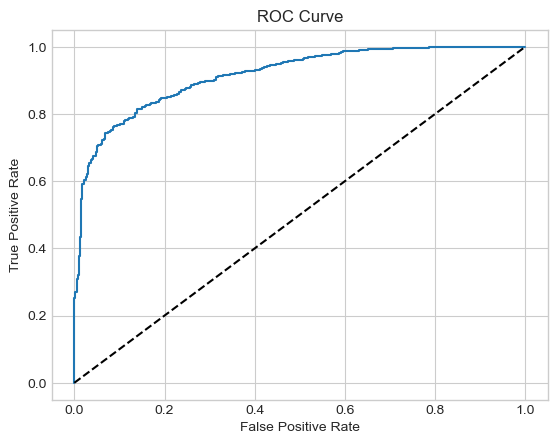

In [134]:
#ROC curve for the model
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
roc = roc_curve(test_y, rf.predict_proba(test_X)[:,1])
plt.plot(roc[0], roc[1])
plt.plot([0,1], [0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

In [135]:
#find misclassification rate for the model
misclassification_rate = 1 - score
print(f'Misclassification rate: {misclassification_rate}')

Misclassification rate: 0.19093610698365526


In [138]:
numerical_cols = ['popularity',
 'release_date',
 'runtime',
 'vote_average',
 'vote_count',
 'rating']

In [139]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Standardize the numerical features
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define a function that creates the Keras model
def create_model(activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(64, input_shape=(X_train.shape[1],), activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create a KerasClassifier object for use with scikit-learn
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=0)

# Define the hyperparameters and their possible values to search over
param_grid = {
    'activation': ['relu', 'sigmoid'],
    'optimizer': ['adam', 'sgd']
}

# Use GridSearchCV to search over the hyperparameter space
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters: {}".format(grid_result.best_params_))
print("Best Score: {:.2f}%".format(grid_result.best_score_ * 100))


/var/folders/js/d6m3lmg13x1dqjyw_1h8pr8h0000gn/T/ipykernel_72363/1482730497.py:28: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=0)


Best Parameters: {'activation': 'sigmoid', 'optimizer': 'sgd'}
Best Score: 69.75%


34/34 [==============================] - 0s 364us/step
Accuracy: 71.87%
Confusion Matrix:
[[  0 303]
 [  0 774]]


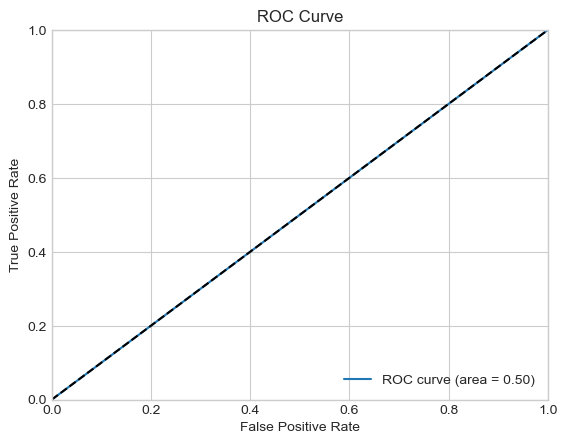

In [142]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

#save the best model
model = grid_result.best_estimator_.model

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [143]:
from sklearn.linear_model import LogisticRegression

def train_model_lr(X, y):
    # Split the data into training and testing sets
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, stratify=y,random_state=123)

    # Define the hyperparameter space to search over for logistic regression
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    }

    # Create a LogisticRegression object
    lr = LogisticRegression(random_state=42)
    
    # Create a default score
    lr.fit(train_X, train_y)
    score_default = lr.score(test_X, test_y)

    # Create a GridSearchCV object to find the best hyperparameters
    grid_search = GridSearchCV(lr, param_grid, cv=5, n_jobs=-1, verbose=1)

    # Fit the GridSearchCV object to the training data
    grid_search.fit(train_X, train_y)

    # Print the best hyperparameters and score
    print("Best hyperparameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)

    # Get the best estimator from the grid search
    best_lr = grid_search.best_estimator_

    # Evaluate the best estimator on the test data
    score = best_lr.score(test_X, test_y)
    print("Test score:", score)

    return best_lr, score, score_default


In [144]:
lr, score, score_lf_d = train_model_lr(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.7806674229532994
Test score: 0.7827298050139275


In [145]:
score = lr.score(test_X, test_y)
print("Test score:", score)
print("Test score Default:", score_lf_d)

Test score: 0.7927191679049034
Test score Default: 0.7019498607242339


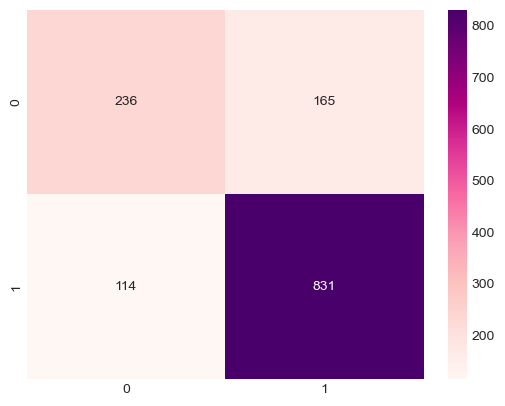

In [146]:
#plot a confusion matrix for the model
cnf = confusion_matrix(test_y, lr.predict(test_X))
sns.heatmap(cnf, annot=True, fmt='d', cmap='RdPu')
plt.show()

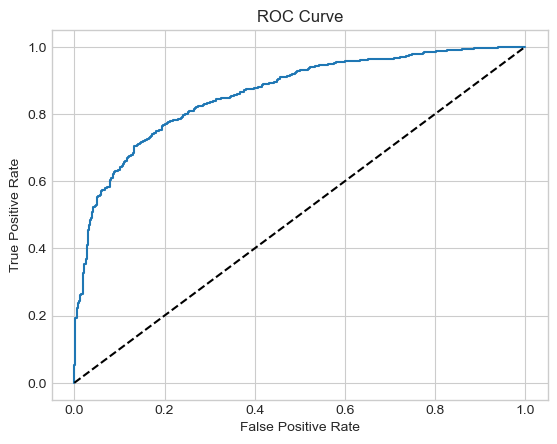

In [147]:
#ROC curve for the model
roc = roc_curve(test_y, lr.predict_proba(test_X)[:,1])
plt.plot(roc[0], roc[1])
plt.plot([0,1], [0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

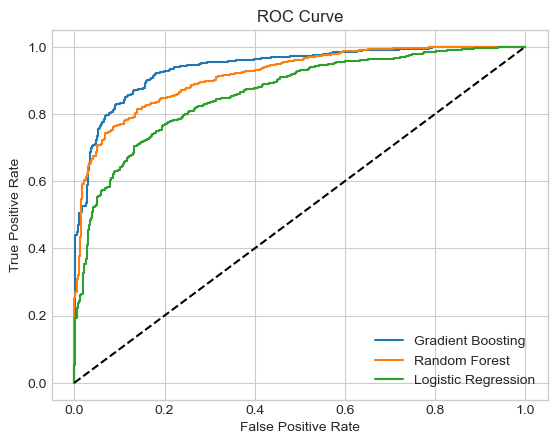

In [148]:
#plot all the ROC curves together clf, rf, and lr
roc_clf = roc_curve(test_y, clf.predict_proba(test_X)[:,1])
roc_rf = roc_curve(test_y, rf.predict_proba(test_X)[:,1])
roc_lr = roc_curve(test_y, lr.predict_proba(test_X)[:,1])
plt.plot(roc_clf[0], roc_clf[1], label='Gradient Boosting')
plt.plot(roc_rf[0], roc_rf[1], label='Random Forest')
plt.plot(roc_lr[0], roc_lr[1], label='Logistic Regression')
plt.plot([0,1], [0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [157]:
#import roc_auc_score
from sklearn.metrics import roc_auc_score
#Make a pretty table of the results print only 2 decimal places
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model","Default Accuracy", "Tuned Accuracy", "AUC"]
x.add_row(["Gradient Boosting", "{:.2f}%".format(score_cfl_d*100), "{:.2f}%".format(clf.score(test_X, test_y)*100), "{:.2f}%".format(roc_auc_score(test_y, clf.predict_proba(test_X)[:,1])*100)])
x.add_row(["Random Forest","{:.2f}%".format(score_rf_d*100), "{:.2f}%".format(rf.score(test_X, test_y)*100), "{:.2f}%".format(roc_auc_score(test_y, rf.predict_proba(test_X)[:,1])*100)])
x.add_row(["Logistic Regression","{:.2f}%".format(score_lf_d*100), "{:.2f}%".format(lr.score(test_X, test_y)*100), "{:.2f}%".format(roc_auc_score(test_y, lr.predict_proba(test_X)[:,1])*100)])
print(x)

+---------------------+------------------+----------------+--------+
|        Model        | Default Accuracy | Tuned Accuracy |  AUC   |
+---------------------+------------------+----------------+--------+
|  Gradient Boosting  |      78.74%      |     88.86%     | 93.90% |
|    Random Forest    |      79.94%      |     80.91%     | 91.54% |
| Logistic Regression |      70.19%      |     79.27%     | 86.13% |
+---------------------+------------------+----------------+--------+


In [161]:
#make a pretty table of the three confusion matrices
from prettytable import PrettyTable
x = PrettyTable()
cnf_clf = confusion_matrix(test_y, clf.predict(test_X))
cnf_rf = confusion_matrix(test_y, rf.predict(test_X))
cnf_lr = confusion_matrix(test_y, lr.predict(test_X))
x.field_names = ["Model","Confusion_matrix"]
x.add_row(["Gradient Boosting", cnf_clf])
x.add_row(["Random Forest", cnf_rf])
x.add_row(["Logistic Regression", cnf_lr])
print(x)

+---------------------+------------------+
|        Model        | Confusion_matrix |
+---------------------+------------------+
|  Gradient Boosting  |    [[306  95]    |
|                     |    [ 55 890]]    |
|    Random Forest    |    [[156 245]    |
|                     |    [ 12 933]]    |
| Logistic Regression |    [[236 165]    |
|                     |    [114 831]]    |
+---------------------+------------------+
